In [2]:
# --- Huber Regression Boilerplate Code ---

# !pip install numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# --- 1. Generate synthetic data ---
np.random.seed(42)
n, p = 100, 5
X = np.random.randn(n, p)
true_beta = np.array([1.5, -2.0, 0.5, 0, 0])

# Add Gaussian noise
y = X.dot(true_beta) + np.random.randn(n)

# Optional: introduce outliers
n_outliers = int(0.1 * n)  # 10% outliers
outlier_indices = np.random.choice(n, n_outliers, replace=False)
y[outlier_indices] += np.random.uniform(10, 20, size=n_outliers)

In [4]:

# --- 2. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:

# --- 3. Fit Huber regression ---
huber = HuberRegressor(epsilon=1.35, max_iter=1000)  # epsilon=1.35 is common default
huber.fit(X_train, y_train)

HuberRegressor(max_iter=1000)

In [6]:

# --- 4. Predictions ---
y_pred_train = huber.predict(X_train)
y_pred_test = huber.predict(X_test)

In [7]:
# --- 5. Evaluation ---
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train RMSE:", rmse_train, "MAE:", mae_train)
print("Test RMSE:", rmse_test, "MAE:", mae_test)
print("Estimated coefficients:", huber.coef_)
print("Intercept:", huber.intercept_)

Train RMSE: 4.71643162372801 MAE: 2.170578517215968
Test RMSE: 3.033768296612976 MAE: 1.4014291055182873
Estimated coefficients: [ 1.58997183 -1.92512601  0.58792529 -0.09032975 -0.05467233]
Intercept: 0.05283320646465307


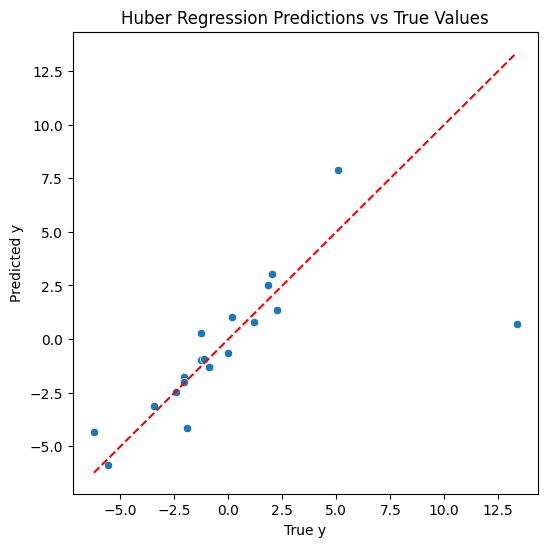

In [8]:
# --- 6. Visualization ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Huber Regression Predictions vs True Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
